In [1]:
import pandas as pd
import numpy as np
from src.data_loader import *
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = split_dataset()

In [3]:
data.keys()

dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test'])

In [4]:
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

In [5]:
dt1 = DecisionTreeRegressor(max_depth=2, random_state=123)
dt1.fit(X_train, y_train)
y_1_train = dt1.predict(X_train)
y_1_test = dt1.predict(X_test)

dt2 = DecisionTreeRegressor(max_depth=5, random_state=123)
dt2.fit(X_train, y_train)
y_2_train = dt2.predict(X_train)
y_2_test = dt2.predict(X_test)

In [6]:
train_rmse = []
test_rmse = []

for i in range(1, 30):
    dt1 = DecisionTreeRegressor(max_depth=i, random_state=123)
    dt1.fit(X_train, y_train)
    y_pred_train_1 = dt1.predict(X_train)
    mse_train_1 = mean_squared_error(y_train, y_pred_train_1)
    train_rmse.append(np.sqrt(mse_train_1))

    y_pred_test_1 = dt1.predict(X_test)
    mse_test_1 = mean_squared_error(y_pred_test_1, y_test)
    test_rmse.append(np.sqrt(mse_test_1))
    print(f"Max depth = {i}: Train RMSE: {np.sqrt(mse_train_1):.2f}, Test RMSE: {np.sqrt(mse_test_1):.2f}")

Max depth = 1: Train RMSE: 192.79, Test RMSE: 347.77
Max depth = 2: Train RMSE: 121.91, Test RMSE: 284.97
Max depth = 3: Train RMSE: 76.20, Test RMSE: 237.21
Max depth = 4: Train RMSE: 55.24, Test RMSE: 243.29
Max depth = 5: Train RMSE: 35.99, Test RMSE: 256.45
Max depth = 6: Train RMSE: 30.46, Test RMSE: 261.14
Max depth = 7: Train RMSE: 18.63, Test RMSE: 244.09
Max depth = 8: Train RMSE: 12.94, Test RMSE: 242.25
Max depth = 9: Train RMSE: 9.81, Test RMSE: 275.09
Max depth = 10: Train RMSE: 7.75, Test RMSE: 269.65
Max depth = 11: Train RMSE: 5.79, Test RMSE: 275.74
Max depth = 12: Train RMSE: 4.19, Test RMSE: 287.10
Max depth = 13: Train RMSE: 2.90, Test RMSE: 270.73
Max depth = 14: Train RMSE: 1.29, Test RMSE: 247.33
Max depth = 15: Train RMSE: 0.70, Test RMSE: 281.47
Max depth = 16: Train RMSE: 0.34, Test RMSE: 282.74
Max depth = 17: Train RMSE: 0.24, Test RMSE: 268.93
Max depth = 18: Train RMSE: 0.15, Test RMSE: 276.17
Max depth = 19: Train RMSE: 0.09, Test RMSE: 276.16
Max depth =

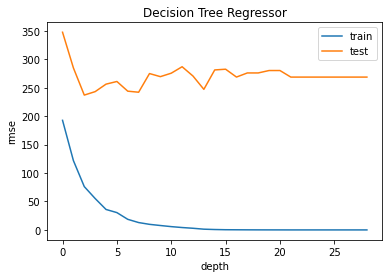

In [7]:
plt.plot(train_rmse, label='train')
plt.plot(test_rmse, label='test')
plt.xlabel('depth')
plt.ylabel('rmse')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()

## Elbow method 
(this is not officially recognized as the most effective method to find the optimized k value, but it's a good reference)

In [11]:
dt = DecisionTreeRegressor(max_depth=7, random_state=123)
dt.fit(X_train, y_train)
y_pred_train_1 = dt.predict(X_train)
mse_train_1 = mean_squared_error(y_train, y_pred_train_1)
train_rmse.append(np.sqrt(mse_train_1))

y_pred_test_1 = dt.predict(X_test)
mse_test_1 = mean_squared_error(y_pred_test_1, y_test)
test_rmse.append(np.sqrt(mse_test_1))
print(f"Max depth = 10: Train RMSE: {np.sqrt(mse_train_1):.2f}, Test RMSE: {np.sqrt(mse_test_1):.2f}")

Max depth = 10: Train RMSE: 18.63, Test RMSE: 244.09


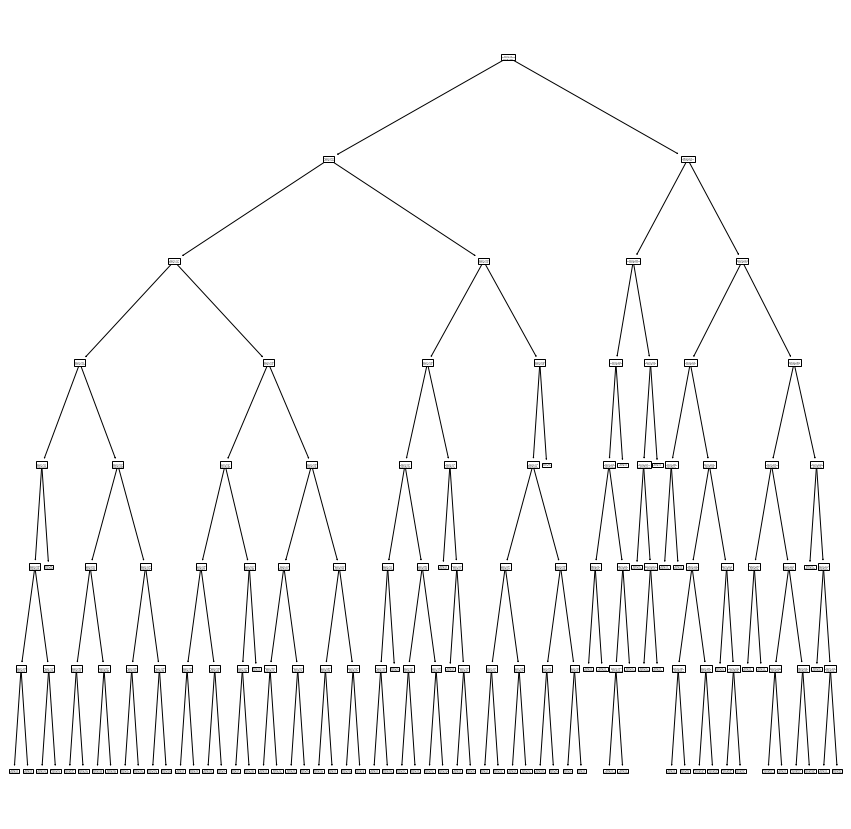

In [12]:
# Plot the regression tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(dt)
plt.show()

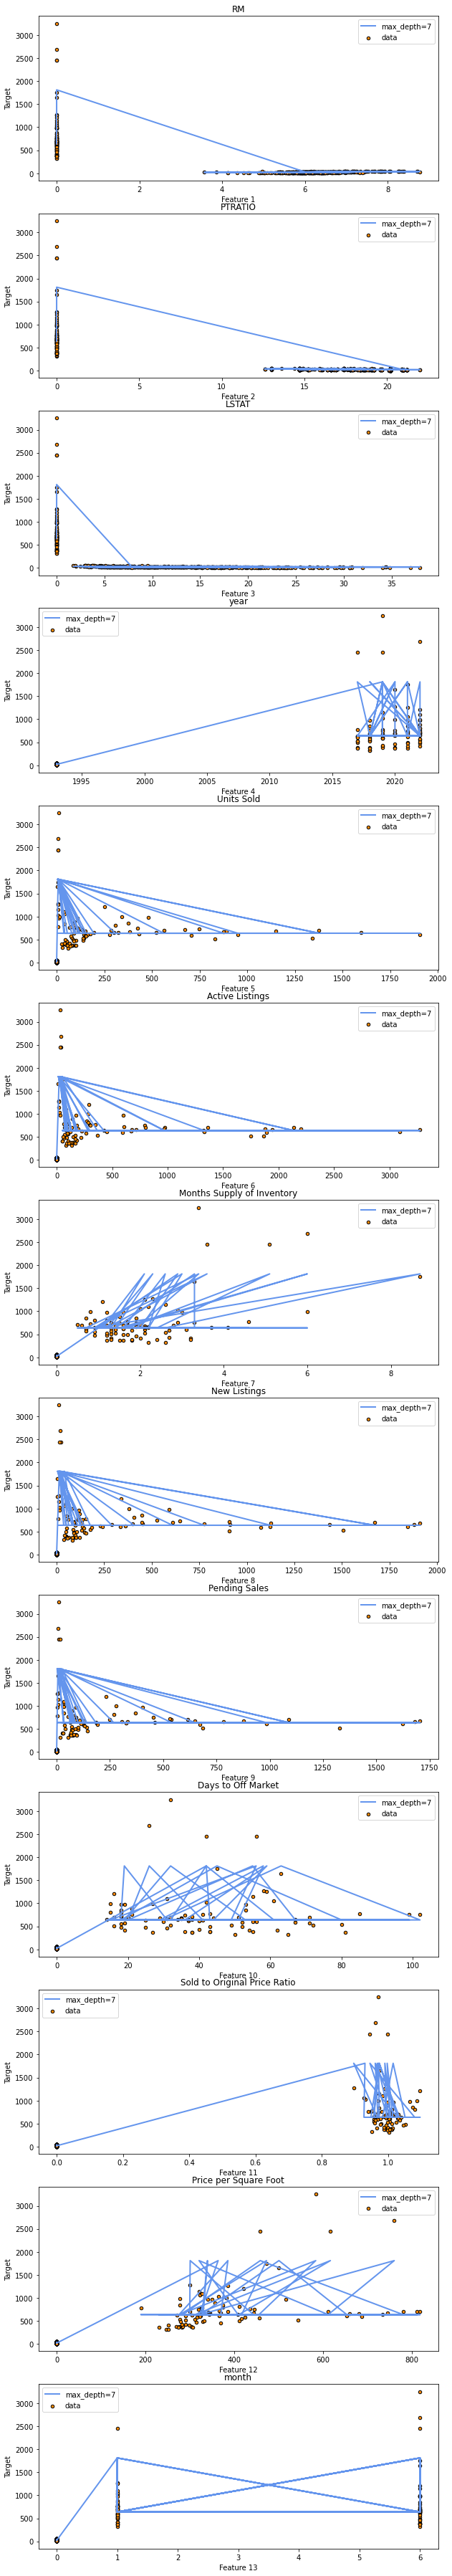

In [14]:
import matplotlib.pyplot as plt

# Assuming n is the number of features in your dataset
n = X_train.shape[1]

fig, axes = plt.subplots(n, 1, figsize=(10, 5 * n))

for i in range(n):
    axes[i].scatter(X_train.iloc[:, i], y_train, s=20, edgecolor="black", c="darkorange", label="data")
    axes[i].plot(X_train.iloc[:, i], y_1_train, color="cornflowerblue", label="max_depth=7", linewidth=2)
    axes[i].set_xlabel(f"Feature {i+1}")
    axes[i].set_ylabel("Target")
    axes[i].set_title(list(X_train.columns)[i])
    axes[i].legend()

plt.show()
